# Modelleren - analyse opdracht

## Simulatie uitbreiding 1

In [1]:
# prepare environment
import numpy as np
import matplotlib.pyplot as plt

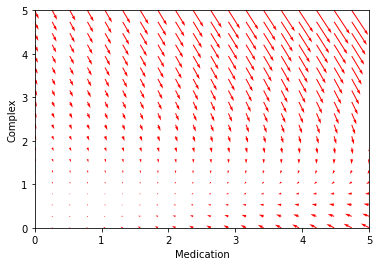

In [2]:
# https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# function that calculates dm/dt and dc/dt
def ddt(t, m, c, m0, r0, kplus, kmin, kleinek2, kleinek3):
    K1 = kmin/(kplus*m0)
    K2 = kleinek3/(kplus*r0)
    K3 = m0/r0
    K4 = (kmin + kleinek2)/(kplus*r0)
    
    dmdt = -m*(1 - c) + K1*c - K2*m
    dcdt = K3*m*(1 - c) - K4*c
    return [dmdt, dcdt]

# function that produces phase plane 
def pplane(t0, m_max, c_max, m0, r0, kplus, kmin, kleinek2, kleinek3):
    # grid of values for m and c
    m = np.linspace(0, m_max, 20)
    c = np.linspace(0, c_max, 20)

    # matrices/arrays to save outcomes 
    M, C = np.meshgrid(m, c)
    u, v = np.zeros(M.shape), np.zeros(C.shape)

    # calculate values for grid of m,c
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            x = M[i,j]
            y = C[i,j]
            yprime = ddt(t0, x, y, m0, r0, kplus, kmin, kleinek2, kleinek3)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    # plot phase plane 
    Q = plt.quiver(M, C, u, v, color = 'r')
    plt.xlim([0,m_max])
    plt.ylim([0,c_max])
    plt.xlabel('Medication')
    plt.ylabel('Complex')

# test function 
pplane(0, 5, 5, 1, 1, 1, 1, 1, 1)

In [3]:
# function for RK4 
def RK4_M(t0, m0, c0, r0, kplus, kmin, kleinek2, kleinek3, tn, n):
    # step size 
    h = (tn - t0)/n
    
    # create vectors to save iterations 
    t = np.zeros(n+1) 
    t[0] = t0
    
    m = np.zeros(n+1)
    m[0] = m0
    
    c = np.zeros(n+1) 
    c[0] = c0
    
    # perform RK4
    for i in range(n):
        k1_m, k1_c = np.multiply(ddt(t[i], m[i], c[i], m0, r0, kplus, kmin, kleinek2, kleinek3), h)
        k2_m, k2_c = np.multiply(ddt(t[i]+h/2, m[i]+k1_m/2, c[i]+k1_c/2, m0, r0, kplus, kmin, kleinek2, kleinek3), h)
        k3_m, k3_c = np.multiply(ddt(t[i]+h/2, m[i]+k2_m/2, c[i]+k2_c/2, m0, r0, kplus, kmin, kleinek2, kleinek3), h)
        k4_m, k4_c = np.multiply(ddt(t[i]+h, m[i]+k3_m, c[i]+k3_c, m0, r0, kplus, kmin, kleinek2, kleinek3), h)
        k_m = (k1_m + 2*k2_m + 2*k3_m + k4_m)/6
        k_c = (k1_c + 2*k2_c + 2*k3_c + k4_c)/6
        
        # set and save values 
        t[i+1] = t[i] + h
        m[i+1] = m[i] + k_m
        c[i+1] = c[i] + k_c
        
    # translate values back to dimension-full variables
    t = t * kplus * r0
    m = m * m0
    c = c * r0
        
    return(t, m, c)

# function that creates graphs 
def sim_plot(t0, m0, c0, r0, kplus, kmin, kleinek2, kleinek3, tn, n, maxis, caxis, counter, title):
    time, med, com = RK4_M(t0, m0, c0, r0, kplus, kmin, kleinek2, kleinek3, tn, n)
    
    plt.figure(counter)
    plt.subplot(211)
    plt.plot(time, med) # plotting medication 
    plt.title(title)
    plt.ylabel('Medication (mol/L)')
    plt.xticks(color='w')
    plt.xlim(0, max(time))
    plt.ylim(0, maxis)
    
    plt.subplot(212)
    plt.plot(time, com) # plotting complex
    plt.xlabel('Time (s)')
    plt.ylabel('Complex (mol/L)')
    plt.xlim(0, max(time))
    plt.ylim(0, caxis)

Trying the functions: 

In [4]:
# set starting values 
t0 = 0
m0 = 1
c0 = 0
r0 = 1
kplus = 1
kmin = 1 
kleinek2 = 1 
kleinek3 = 1 
kon = 1
tn = 2
n = 10

# try function 
RK4_M(t0, m0, c0, r0, kplus, kmin, kleinek2, kleinek3, tn, n)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([1.        , 0.69355962, 0.5045379 , 0.37848237, 0.28996835,
        0.22553416, 0.17738522, 0.14069599, 0.11232013, 0.09012016,
        0.07259504]),
 array([0.        , 0.12517371, 0.16578637, 0.17033446, 0.15936628,
        0.14235108, 0.12381468, 0.10590642, 0.08958148, 0.07518342,
        0.06274451]))

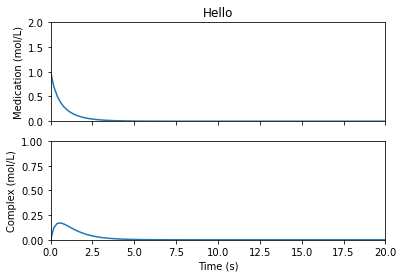

In [5]:
# set starting values 
t0 = 0
m0 = 1
c0 = 0
r0 = 1
kplus = 1
kmin = 1 
kleinek2 = 1 
kleinek3 = 1 
tn = 20
n = 100

# plot simulation 
sim_plot(t0, m0, c0, r0, kplus, kmin, kleinek2, kleinek3, tn, n, 2, 1, 100, "Hello")

## Performing simulation

### Simulations with varying starting concentrations

In [6]:
# starting values that stay the same throughout the simulations 
t0 = 0
c0 = 0
tn = 15
n = 1000

# starting concentrations 
m0 = np.linspace(1, 5, 5)
r0 = np.linspace(0.5, 5, 5)

# rates 
kplus = np.linspace(1e-3, 1e3, 5) 
kmin = np.linspace(1e-3, 1e3, 5)
kleinek2 = np.linspace(1e-3, 1e3, 5)
kleinek3 = np.linspace(1e-3, 1e3, 5)

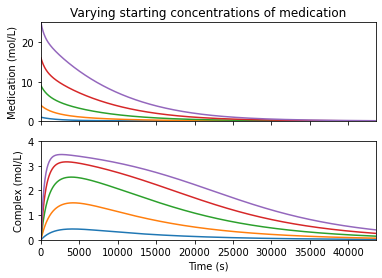

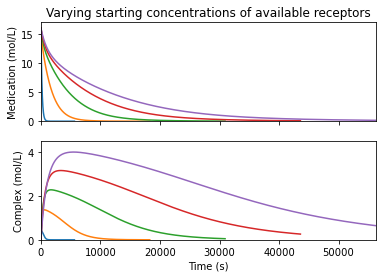

In [7]:
for i in range(5):
    sim_plot(t0, m0[i], c0, r0[3], kplus[3], kmin[3], kleinek2[3], kleinek3[3], tn, n, 25, 4, 0, "Varying starting concentrations of medication") # varieer m0
    sim_plot(t0, m0[3], c0, r0[i], kplus[3], kmin[3], kleinek2[3], kleinek3[3], tn, n, 17, 4.5, 1, "Varying starting concentrations of available receptors") # varieer r0

### Simulations with varying rates

In [8]:
# starting values that stay the same throughout the simulations 
t0 = 0
c0 = 0
tn = 15
n = 1000

# starting concentrations 
m0 = np.linspace(1, 5, 5)
r0 = np.linspace(0.5, 5, 5)

# rates 
kplus = np.linspace(1e-3, 1e3, 5) 
kmin = np.linspace(1e-3, 1e3, 5)
kleinek2 = np.linspace(1e-3, 1e3, 5)
kleinek3 = np.linspace(1e-3, 1e3, 5)

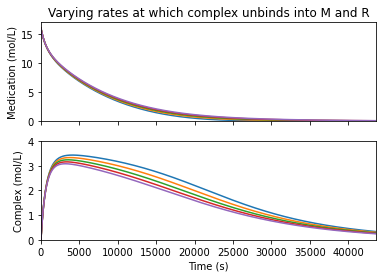

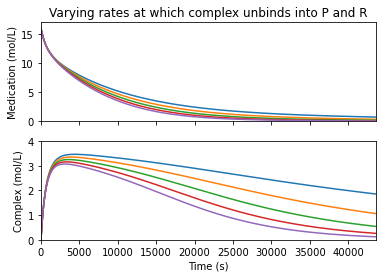

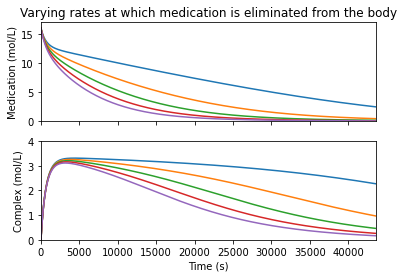

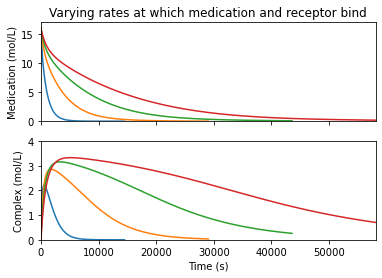

In [9]:
for i in range(5):
    sim_plot(t0, m0[3], c0, r0[3], kplus[3], kmin[i], kleinek2[3], kleinek3[3], tn, n, 17, 4, 3, "Varying rates at which complex unbinds into M and R") # varieer kmin
    sim_plot(t0, m0[3], c0, r0[3], kplus[3], kmin[3], kleinek2[i], kleinek3[3], tn, n, 17, 4, 4, "Varying rates at which complex unbinds into P and R") # varieer k2
    sim_plot(t0, m0[3], c0, r0[3], kplus[3], kmin[3], kleinek2[3], kleinek3[i], tn, n, 17, 4, 5, "Varying rates at which medication is eliminated from the body") # varieer k3
    
for i in range(4):
    sim_plot(t0, m0[3], c0, r0[3], kplus[i+1], kmin[3], kleinek2[3], kleinek3[3], tn, n, 17, 4, 6, "Varying rates at which medication and receptor bind") # varieer kplus